# Keystroke Dynamics Benchmark Dataset
https://www.cs.cmu.edu/~keystroke/


### Content
1. EDA
2. Peprocessing & Feature Engineering
3. Modelling & Eval
4. Conclusion

In [78]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = 20, 4

# 1. EDA
Will do the EDA on the entire dataset without making any modifications. 
Later processing and modelling will be done only on the train set.

- 1.1 Outliers  
- 1.2 Correlations  
- 1.3 Embeddings
- 1.4 Modality


Summary:
- Fair amount of data 20400 obs, half of these can be used for training
- "SessionIndex" and "rep" can be dropped for simplicity without losing correctness
- No missing values
- Does have outliers, sprinkeled all over the place - better use as many dimensions as possible
- Considerable amout of pairwise correlations, best to use PCA

In [5]:
raw = pd.read_csv("./DSL-StrongPasswordData.csv")
raw.shape

(20400, 34)

In [6]:
# subject, sessionIndex and rep are the only metadata related cols

raw.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

In [11]:
# Doesnt seem to have any missing values
# Looks like there are some outliers

raw.describe()

,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,...,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,...,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,...,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,...,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,...,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,...,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,...,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


In [10]:
# Missing values

raw.isnull().any().any()

False

## 1.1 Outliers
- Not sure if to remove any as it might be a good feature to discriminate between users
- Will leave it as is for this task, but for the real deal I would conduct a deeper analysis and compare models

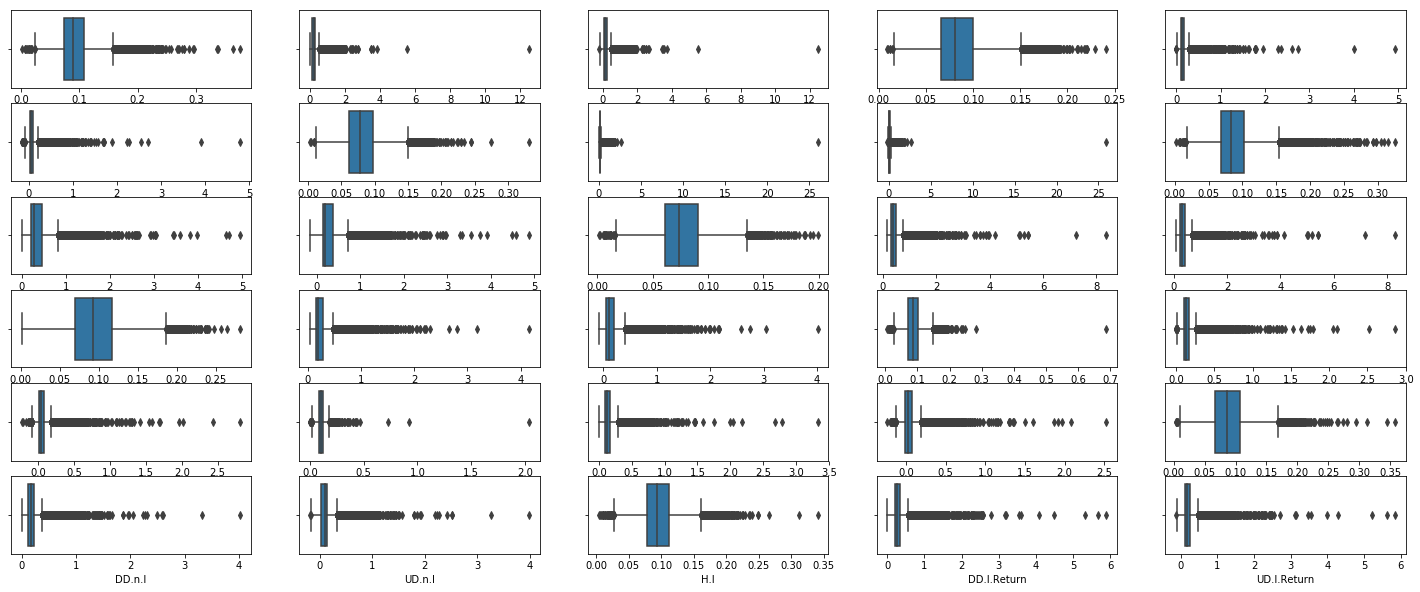

In [20]:
fig, axarr = plt.subplots(nrows=6, ncols=5, figsize=(25, 10))
for col, ax in zip(raw.drop(["sessionIndex", "rep", "subject"], axis=1).columns, itertools.chain(*axarr)):
    sns.boxplot(raw[col], ax=ax)
plt.show()

## 1.2 Correlations
- Pairwise correlations due to how the data has been collected (H + UD = DD)
- Correlation not perfect which means it does contain additional information
- Best handled by either computing derived features (e.g. differences) or using PCA

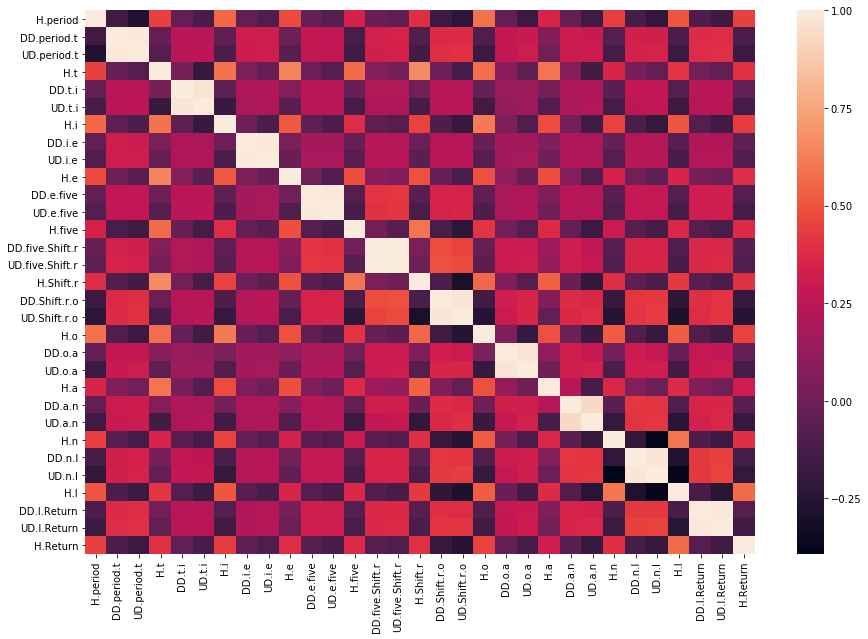

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(raw.drop(["sessionIndex", "rep", "subject"], axis=1).corr())
plt.show()

## 1.3 Embeddings
- Using PCA we reach ~99% explainability in variance with only the first 20 eigenvectors
- Using TSNE we can observe that the majority of points are nicely clustered around their respective subjects, although there is a high number of outliers all over the place. I suspect the task will boil down to "learning" the outliers (not anomalies) - the deviations unique to each person.

In [58]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

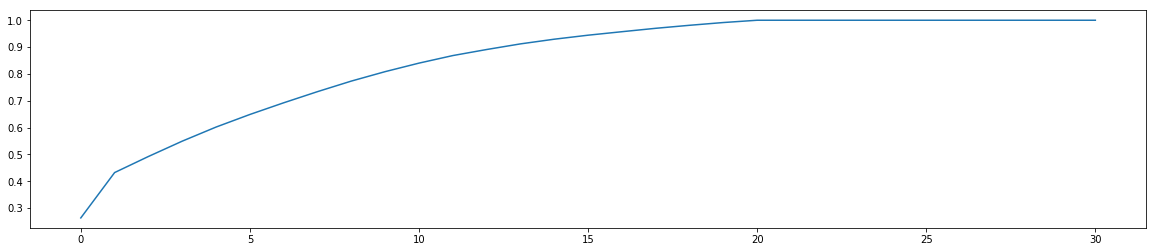

In [50]:
# Explained variance using PCA

scaled = StandardScaler().fit_transform(raw.drop(["sessionIndex", "rep", "subject"], axis=1))
pca = PCA().fit(scaled)

cum_var = [sum(pca.explained_variance_ratio_[:i+1]) for i in range(pca.n_components_)]
plt.plot(cum_var)
plt.show()

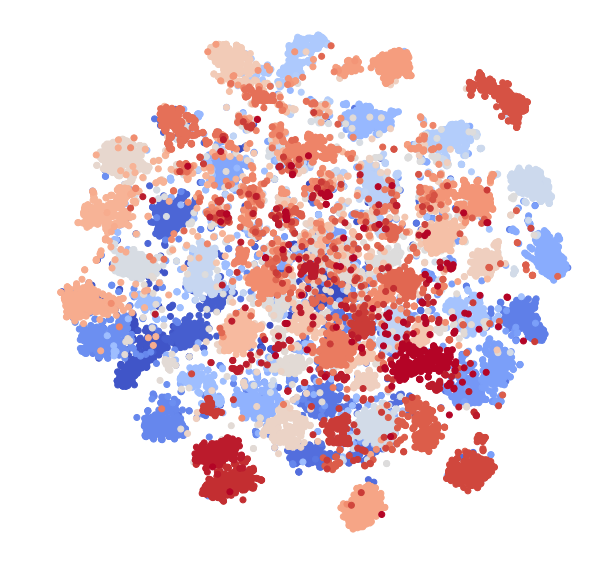

In [62]:
# TSNE embedding to get a sense of how complicated the distribution is

embd = TSNE(n_components=2).fit_transform(scaled)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.scatter(embd[:, 0], embd[:, 1], cmap="coolwarm", c=LabelEncoder().fit_transform(raw["subject"]))
plt.show()

## 1.4 Modality
- Check whether a single user has multiple modes (if so a simple gaussian wont do)
- Each subject seems to be multimodal and noisy
- If the requirement is one classifier/model per person then it would have to handle mixtures

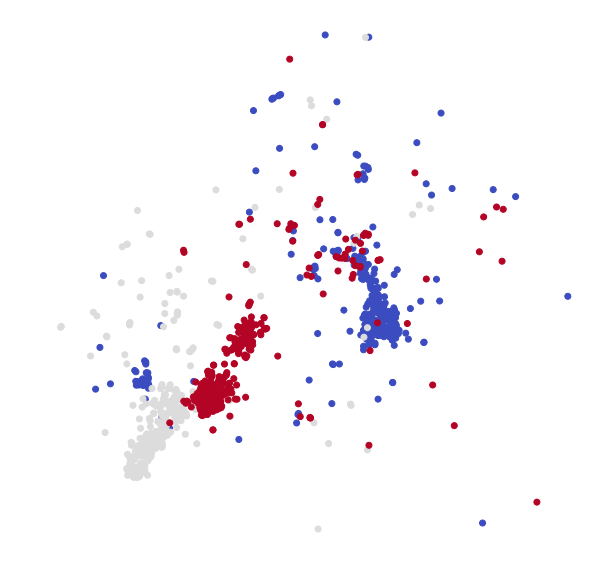

In [70]:
sample_mask = raw["subject"].isin(raw["subject"].unique()[:3])
sample_embd = embd[sample_mask]

# Each user is a different color
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.scatter(sample_embd[:, 0], sample_embd[:, 1], cmap="coolwarm", c=LabelEncoder().fit_transform(raw[sample_mask]["subject"]))
plt.show()

# 2. Preprocessing and Feature Engineering
- No missing values to impute
- Will remove 'sessionIndex' and 'rep' for simplicity
- Will not remove any outliers, again for simplicity
- Will PCA the dataset and keep the components explaining 99.9% (too many but I want to keep discriminatory power for outliers)

In [77]:
from sklearn.pipeline import make_pipeline

data = raw.drop(["sessionIndex", "rep"], axis=1)

train  = data.groupby("subject").head(200)
test  = data.groupby("subject").tail(200)

pipeline = make_pipeline(StandardScaler(), PCA(n_components=0.999))


# Should use CV but am going to settle for simple train/val split
train_train = train.groupby("subject").head(160)
train_train = pd.concat([pd.DataFrame(pipeline.fit_transform(train_train.drop(["subject"], axis=1))), 
                         train_train["subject"].reset_index(drop=True)], axis=1)

train_val = train.groupby("subject").tail(40)
train_val = pd.concat([pd.DataFrame(pipeline.transform(train_val.drop(["subject"], axis=1))), 
                         train_val["subject"].reset_index(drop=True)], axis=1)

# 3. Modelling and Eval
- Will use a GMM since it handles multi-modalities
- Would have been curious to try a classifier trained on all data points, but instructions say to train a model per person
- For each user gridsearch to find optimal number of components
- Training done on train_train set, hyperparams chosen to maximise score on train_val
- Will skip using a simpler model for benchmarking because of time constraints

3.1 Model Definition  
3.2 Training  
3.3 Evaluation  

## 3.1 Model Definition
- Implementing a a GMM
- Test on toy data as well as a user

In [413]:
from scipy.stats import multivariate_normal   


def get_probas(X, components):
    """
    Return un-normalised posteriors [components * observations]
    """
    return np.vstack([component.get_weights(X) for component in components])


def predict_proba(X, components):
    """
    Get max proba for each point
    """
    probas = get_probas(X, components)
    return probas.max(axis=0)


def em(X, components, n_iter=20):
    for _ in range(n_iter):
        weights = get_probas(X, components)
        weights = weights / weights.sum(axis=0)
        weights = np.nan_to_num(weights)
        for weights_, component in zip(weights, components):
            component.update(weights_.reshape([-1, 1]), X)
            #print(np.isnan(component.cov).any())
    return components


class Component(object):
    def __str__(self):
        return f"{{'prior': {self.prior}, 'mean': {self.mean}, 'cov': {self.cov} }}"
    
    @classmethod
    def init_from_data(cls, X):
        mean = X[np.random.randint(low=0, high=len(X))]
        return cls(mean=mean)
    
    def __init__(self, mean, cov=None, prior=None):
        self.prior = prior if prior is not None else 1
        self.mean = mean
        self.cov = cov if cov is not None else np.eye(len(mean))
    
    def get_weights(self, X):
        return self.prior * multivariate_normal.pdf(X, mean=self.mean, cov=self.cov)
        
    def update(self, weights, X):
        self.prior = np.mean(weights)
        self.mean = np.sum(weights * X, axis=0) / np.sum(weights)
        self.cov = np.dot((X - self.mean).T, weights * (X - self.mean)) / np.sum(weights) + np.eye(len(self.mean)) * 1e-7

        
class GMM(object):
    def __init__(self, n_components=1, n_iter=20, n_restart=3):
        """
        :param n_components: number of clusters
        :param n_iter: number of iterations in EM
        :param n_restart: how many times to restart to pick best one
        """
        self.components = []
        self.n_components = n_components
        self.n_iter = n_iter
        self.n_restart = n_restart

    def fit(self, X):
        gmms = [em(X, [Component.init_from_data(X) for _ in range(self.n_components)], self.n_iter) 
                      for _ in range(self.n_restart)]
        
        likelihoods = [-np.sum(np.log(predict_proba(X, gmm))) for gmm in gmms]
        #print(likelihoods)
        self.components = gmms[np.argmin(likelihoods)]
        return self
        
    def predict_proba(self, X):
        return predict_proba(X, self.components)
    
    def predict_probas(self, X):
        return get_probas(X, self.components)
        

/home/xapharius/work/libs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


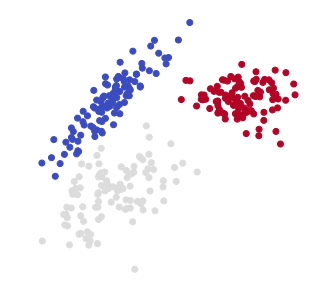

In [372]:
# Test toy data

sample_X = np.vstack([
    np.random.multivariate_normal(mean=[3,3], cov=np.eye(2), size=100),
    np.random.multivariate_normal(mean=[-3,-3], cov=[[2,1],[1,3]], size=100),
    np.random.multivariate_normal(mean=[-3,3], cov=[[1,2],[2,3]], size=100)
])

gmm = GMM(n_components=3, n_restart=10).fit(sample_X)
clusters = np.argmax(gmm.predict_probas(sample_X), axis=0)

plt.figure(figsize=(5, 5))
plt.axis('off')
plt.scatter(sample_X[:, 0], sample_X[:, 1], cmap="coolwarm", c=clusters)
plt.show()

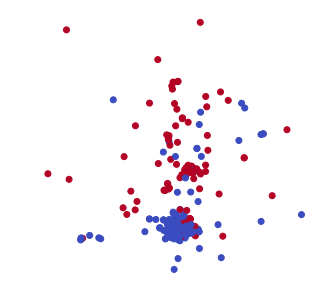

In [269]:
# Test user data

sample_mask = raw["subject"] == raw["subject"].unique()[5]
sample_embd = embd[sample_mask]

sample_X = PCA(n_components=.99).fit_transform(scaled[sample_mask])
gmm = GMM(n_components=2).fit(sample_X)

clusters = np.argmax(gmm.predict_probas(sample_X), axis=0)

plt.figure(figsize=(5, 5))
plt.axis('off')

#sample_embd = TSNE().fit_transform(sample_X)
plt.scatter(sample_embd[:, 0], sample_embd[:, 1], cmap="coolwarm", c=clusters)
plt.show()

## 3.2 Training
- Should do CV, but I'll stick to a single train/val split
- Hyperparam search to find best number of components for each user
- Best number of clusters seems to be uniformally distributed. Limited the hyperparamsearch to max 5 to avoid overfitting

In [437]:
import joblib
from sklearn.metrics import roc_curve


def eer(user, impostor):
    """
    The lower the better.
    https://stackoverflow.com/questions/28339746/equal-error-rate-in-python
    """
    y = [1] * len(user) + [0] * len(impostor)
    y_pred = np.concatenate([user, impostor])
    fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
    fnr = 1 - tpr
    return fpr[np.nanargmin(np.absolute((fnr - fpr)))]


def trainer(train, val, subject, n_components):
    """
    Train a single model (best of 5) for a given subject and the model's hyperparam.
    """
    train_user = train[train["subject"] == subject].drop(["subject"], axis=1).values
    gmm = GMM(n_components, n_restart=10).fit(train_user)
    
    val_user = val[val["subject"] == subject].drop(["subject"], axis=1)
    val_impostor = val[val["subject"] != subject].groupby("subject").head(5).drop(["subject"], axis=1)
    scores_user = gmm.predict_proba(val_user)
    scores_impostor = gmm.predict_proba(val_impostor)
    err_score = eer(scores_user, scores_impostor)
    return err_score

def gridsearch(subject, n_components: list):
    """
    Gridsearch over n_components and select hyperparam with lowest eer
    """
    errs = [trainer(train_train, train_val, subject, k) for k in n_components]
    return n_components[np.argmin(errs)]

def evaluate(train, test, n_components: dict):
    """
    Includes preprocessing and training, returns mean and std
    """
    train = pd.concat([pd.DataFrame(pipeline.fit_transform(train.drop(["subject"], axis=1))), 
                       train["subject"].reset_index(drop=True)], axis=1)

    test = pd.concat([pd.DataFrame(pipeline.transform(test.drop(["subject"], axis=1))), 
                      test["subject"].reset_index(drop=True)], axis=1)
    
    parallel = joblib.Parallel(n_jobs=4)
    res = parallel(joblib.delayed(trainer)(train, test, subject, k) for subject, k in n_components.items())
    return np.mean(res), np.std(res)

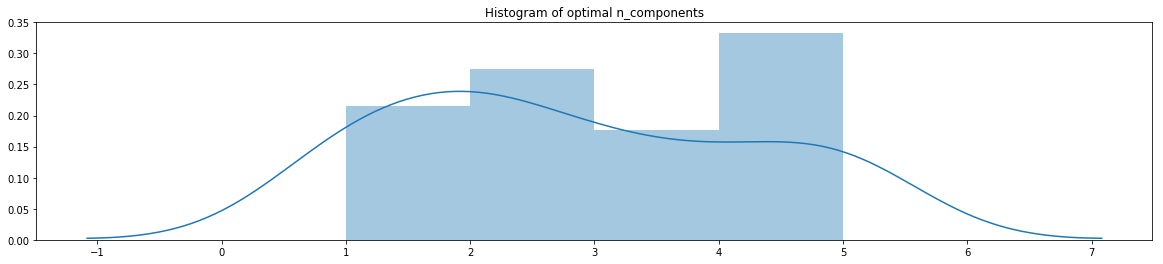

mean val EER: 0.13960784313725486, std val EER 0.11130669138164306


In [445]:
parallel = joblib.Parallel(n_jobs=4)

# gridsearch between 1 to 5 clusters
n_components = parallel(joblib.delayed(gridsearch)(subject, range(1,6)) for subject in train["subject"].unique())
n_components = {subject: k for subject, k in zip(train["subject"].unique(), n_components)}


ax = sns.distplot(list(n_components.values()))
ax.set_title("Histogram of optimal n_components")
plt.show()

res = evaluate(train.groupby("subject").head(160), train.groupby("subject").tail(40), n_components)
print(f"mean val EER: {res[0]}, std val EER {res[1]}")

## 3.3 Evaluation
- Would have expected to be closer to the benchmark Mahalanobis entry since GMMs use that distance metric
- Doesnt seem to overfit much as the scores on the train/val split are close to the train/test split

In [446]:
res = evaluate(train, test, n_components)
print(f"mean test EER: {res[0]}, std test EER {res[1]}")

mean test EER: 0.1516078431372549, std test EER 0.08104128176583775


# 4. Conclusion
- Performed EDA and found little need (outliers, missing values) for processing apart from PCA to remove correlated features (~10)
- User distributions seem to be multi-modal hence I opted to implement a GMM
- Final scores are mediocre haha, but then again it is a vanilla implementation